# <font color="red">B0:Cài đặt thư viện và import </font>
- pip install pandas <br>
- pip install numpy <br>
- pip install matplotlib <br>
- pip install scikit-learn (sklearn) <br>
- pip install pickle (nếu lỗi version thì pip install pickle5) <br>
- pip install yfinance (data về chứng khoán) <br>

In [50]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# <font color="red">B1:Đọc DATA và khám phá dữ liệu ( Công ty Apple) </font>

In [51]:
# Ticker symbol của cổ phiếu bạn muốn dự đoán
ticker_symbol = 'AAPL'

# Lấy dữ liệu lịch sử giá cổ phiếu
stock_data = yf.download(ticker_symbol, start='2003-10-20', end='2023-10-20')


[*********************100%%**********************]  1 of 1 completed


In [52]:
stock_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-10-20,0.403571,0.416786,0.399643,0.414643,0.350561,279132000
2003-10-21,0.416250,0.417857,0.406250,0.413929,0.349957,176461600
2003-10-22,0.409643,0.414286,0.405000,0.406429,0.343616,161599200
2003-10-23,0.405893,0.413393,0.403393,0.410536,0.347089,165211200
2003-10-24,0.402857,0.408036,0.396964,0.403571,0.341200,219856000
...,...,...,...,...,...,...
2023-10-13,181.419998,181.929993,178.139999,178.850006,178.145447,51427100
2023-10-16,176.750000,179.080002,176.509995,178.720001,178.015930,52517000
2023-10-17,176.649994,178.419998,174.800003,177.149994,176.452133,57549400


In [53]:
stock_data.shape

(5035, 6)

In [54]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5035 entries, 2003-10-20 to 2023-10-19
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5035 non-null   float64
 1   High       5035 non-null   float64
 2   Low        5035 non-null   float64
 3   Close      5035 non-null   float64
 4   Adj Close  5035 non-null   float64
 5   Volume     5035 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 275.4 KB


In [55]:
stock_data.keys()
# Những feature của tập dữ liệu

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [56]:
stock_data.describe()
# Thống kê mô tả về tập dữ liệu

,Open,High,Low,Close,Adj Close,Volume
count,5035.000000,5035.000000,5035.000000,5035.000000,5035.000000,5.035000e+03
mean,41.064532,41.517863,40.628309,41.090829,39.433617,4.090240e+08
std,51.311743,51.904384,50.764408,51.358526,51.133204,3.956596e+08
min,0.350893,0.355179,0.343750,0.351786,0.297419,3.145820e+07
25%,5.408036,5.499821,5.311250,5.435714,4.595640,1.151032e+08
50%,20.644644,20.922501,20.425714,20.718929,17.668756,2.754264e+08
75%,46.801250,47.198750,46.445000,46.817499,44.697121,5.759642e+08
max,196.240005,198.229996,195.279999,196.449997,195.412201,3.372970e+09


In [57]:
print('Min:',stock_data['High'].min())
print('Max:',stock_data['High'].max())
print('Mean:',stock_data['High'].mean())
print('Median:',stock_data['High'].median())
print('Mode:',stock_data['High'].mode().iloc[0])
print('Count null:',stock_data['High'].isnull().sum())
print('Q1, Q2, Q3 \n',stock_data['High'].quantile([0.25, 0.5, 0.75]))
print('Var',stock_data['High'].var())
print('STD',stock_data['High'].std())

Min: 0.3551790118217468
Max: 198.22999572753906
Mean: 41.5178631143158
Median: 20.922500610351562
Mode: 3.2142860889434814
Count null: 0
Q1, Q2, Q3 
 0.25     5.499821
0.50    20.922501
0.75    47.198750
Name: High, dtype: float64
Var 2694.06512269908
STD 51.90438442654994


# <font color="red">B2:Kiểm tra và tiền xử lý dữ liệu(nếu có) </font>

In [58]:
stock_data.shape
# kích thước dữ liệu

(5035, 6)

In [59]:
stock_data.dtypes
#Kiểu dữ liệu của từng feature

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [60]:
stock_data.isnull().sum()
#check missing value

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

### <font color = 'yellow' >Ta thấy tập dữ liệu này khá là sạch<font>

### Vẽ biểu đồ phân tích

1: Biểu đồ cột

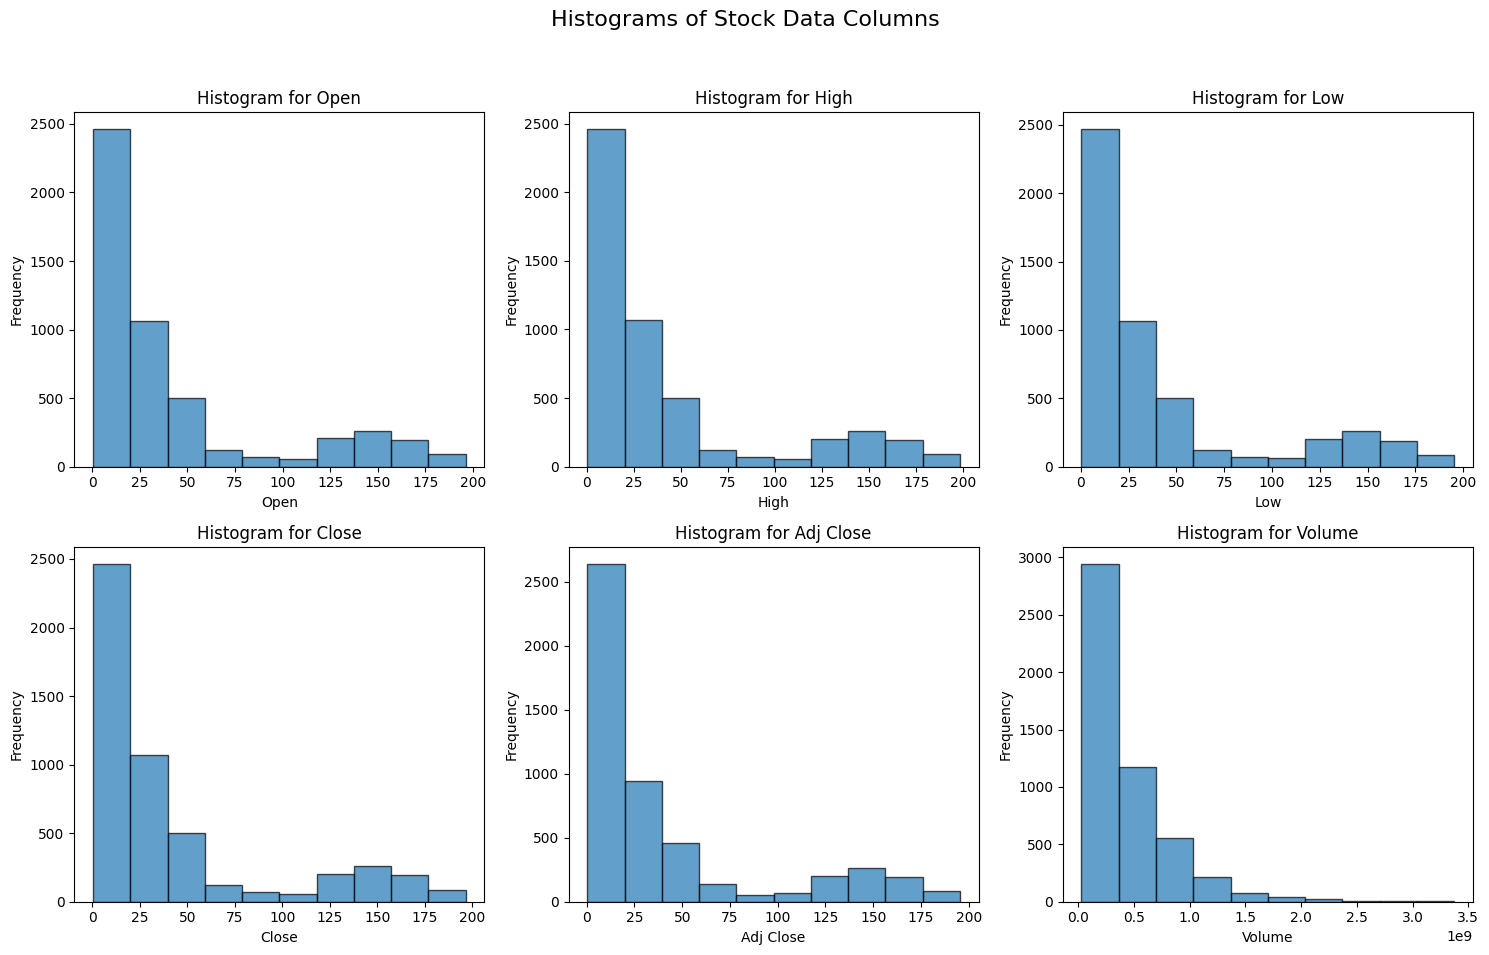

In [61]:
import matplotlib.pyplot as plt
import pandas as pd

# Giả sử stock_data là DataFrame của bạn
# Đảm bảo bạn đã import thư viện pandas và đã có dữ liệu

# Tạo subplot
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15,10))
fig.suptitle('Histograms of Stock Data Columns', fontsize=16)

# Duyệt qua từng cột và vẽ biểu đồ histogram
for i, column in enumerate(stock_data.columns):
    row, col = divmod(i, 3)
    axs[row, col].hist(stock_data[column], bins=10, edgecolor='k', alpha=0.7)
    axs[row, col].set_title(f'Histogram for {column}')
    axs[row, col].set_xlabel(column)
    axs[row, col].set_ylabel('Frequency')

# Tự điều chỉnh khoảng cách giữa các subplot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Hiển thị biểu đồ
plt.show()


Biểu đồ hộp

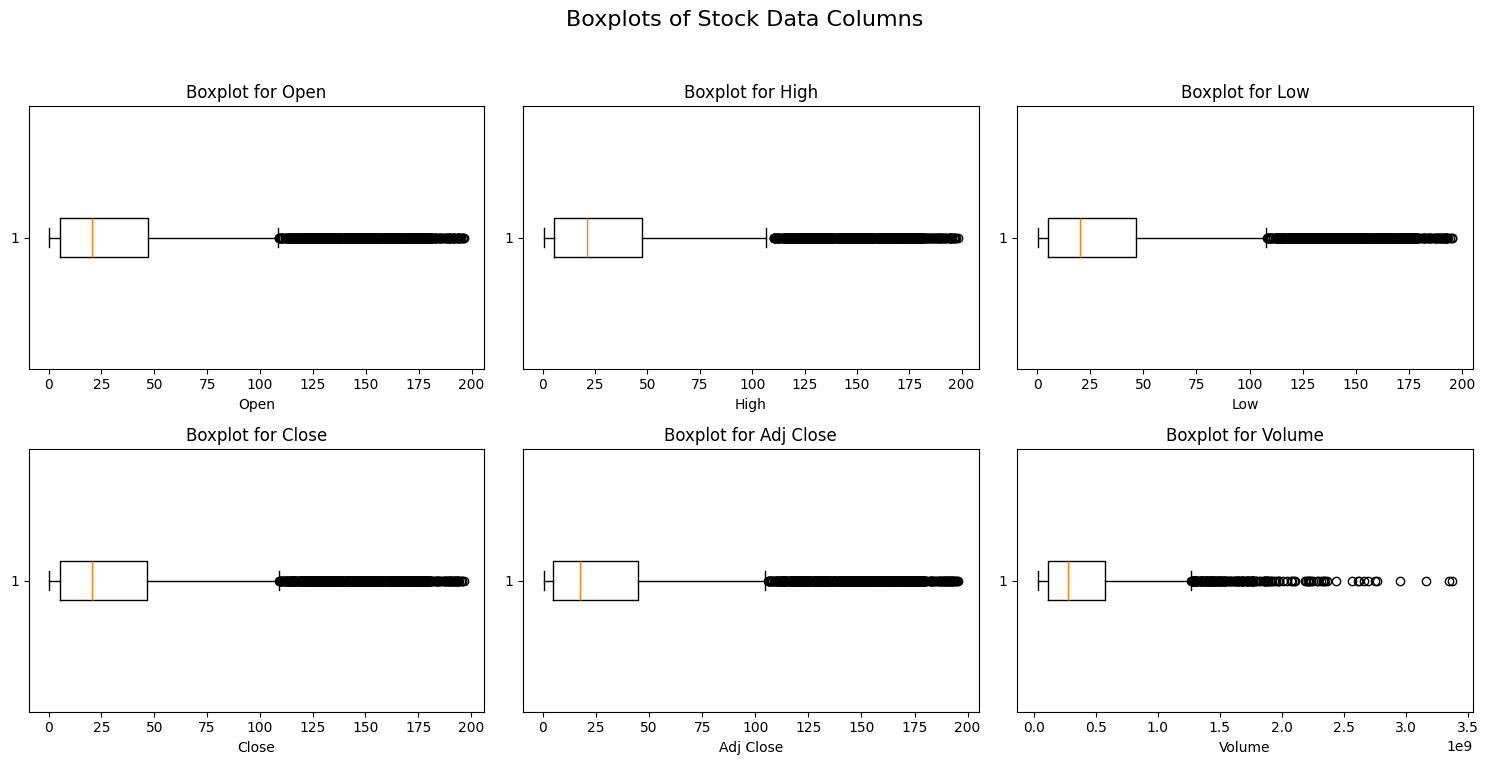

In [62]:
import matplotlib.pyplot as plt
import pandas as pd

# Giả sử stock_data là DataFrame của bạn
# Đảm bảo bạn đã import thư viện pandas và đã có dữ liệu

# Tạo subplot
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
fig.suptitle('Boxplots of Stock Data Columns', fontsize=16)

# Duyệt qua từng cột và vẽ biểu đồ boxplot
for i, column in enumerate(stock_data.columns):
    row, col = divmod(i, 3)
    axs[row, col].boxplot(stock_data[column], vert=False)
    axs[row, col].set_title(f'Boxplot for {column}')
    axs[row, col].set_xlabel(column)

# Tự điều chỉnh khoảng cách giữa các subplot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Hiển thị biểu đồ
plt.show()


Biểu đồ heatmap

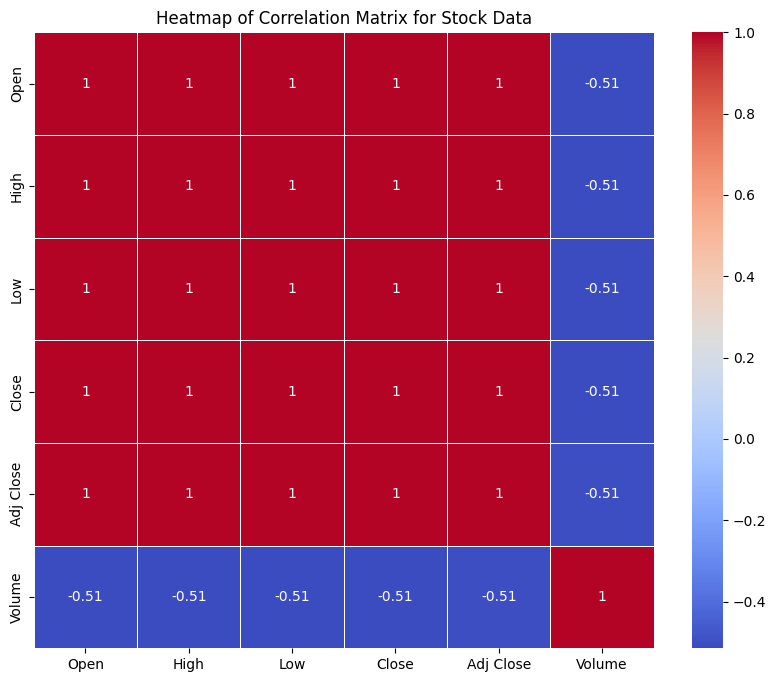

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Giả sử stock_data là DataFrame của bạn
# Đảm bảo bạn đã import thư viện pandas và seaborn và đã có dữ liệu

# Tạo heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(stock_data.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap of Correlation Matrix for Stock Data')
plt.show()


Biểu đồ scatter thể hiện sự tuyến tính giữa từng cột với cột adj close

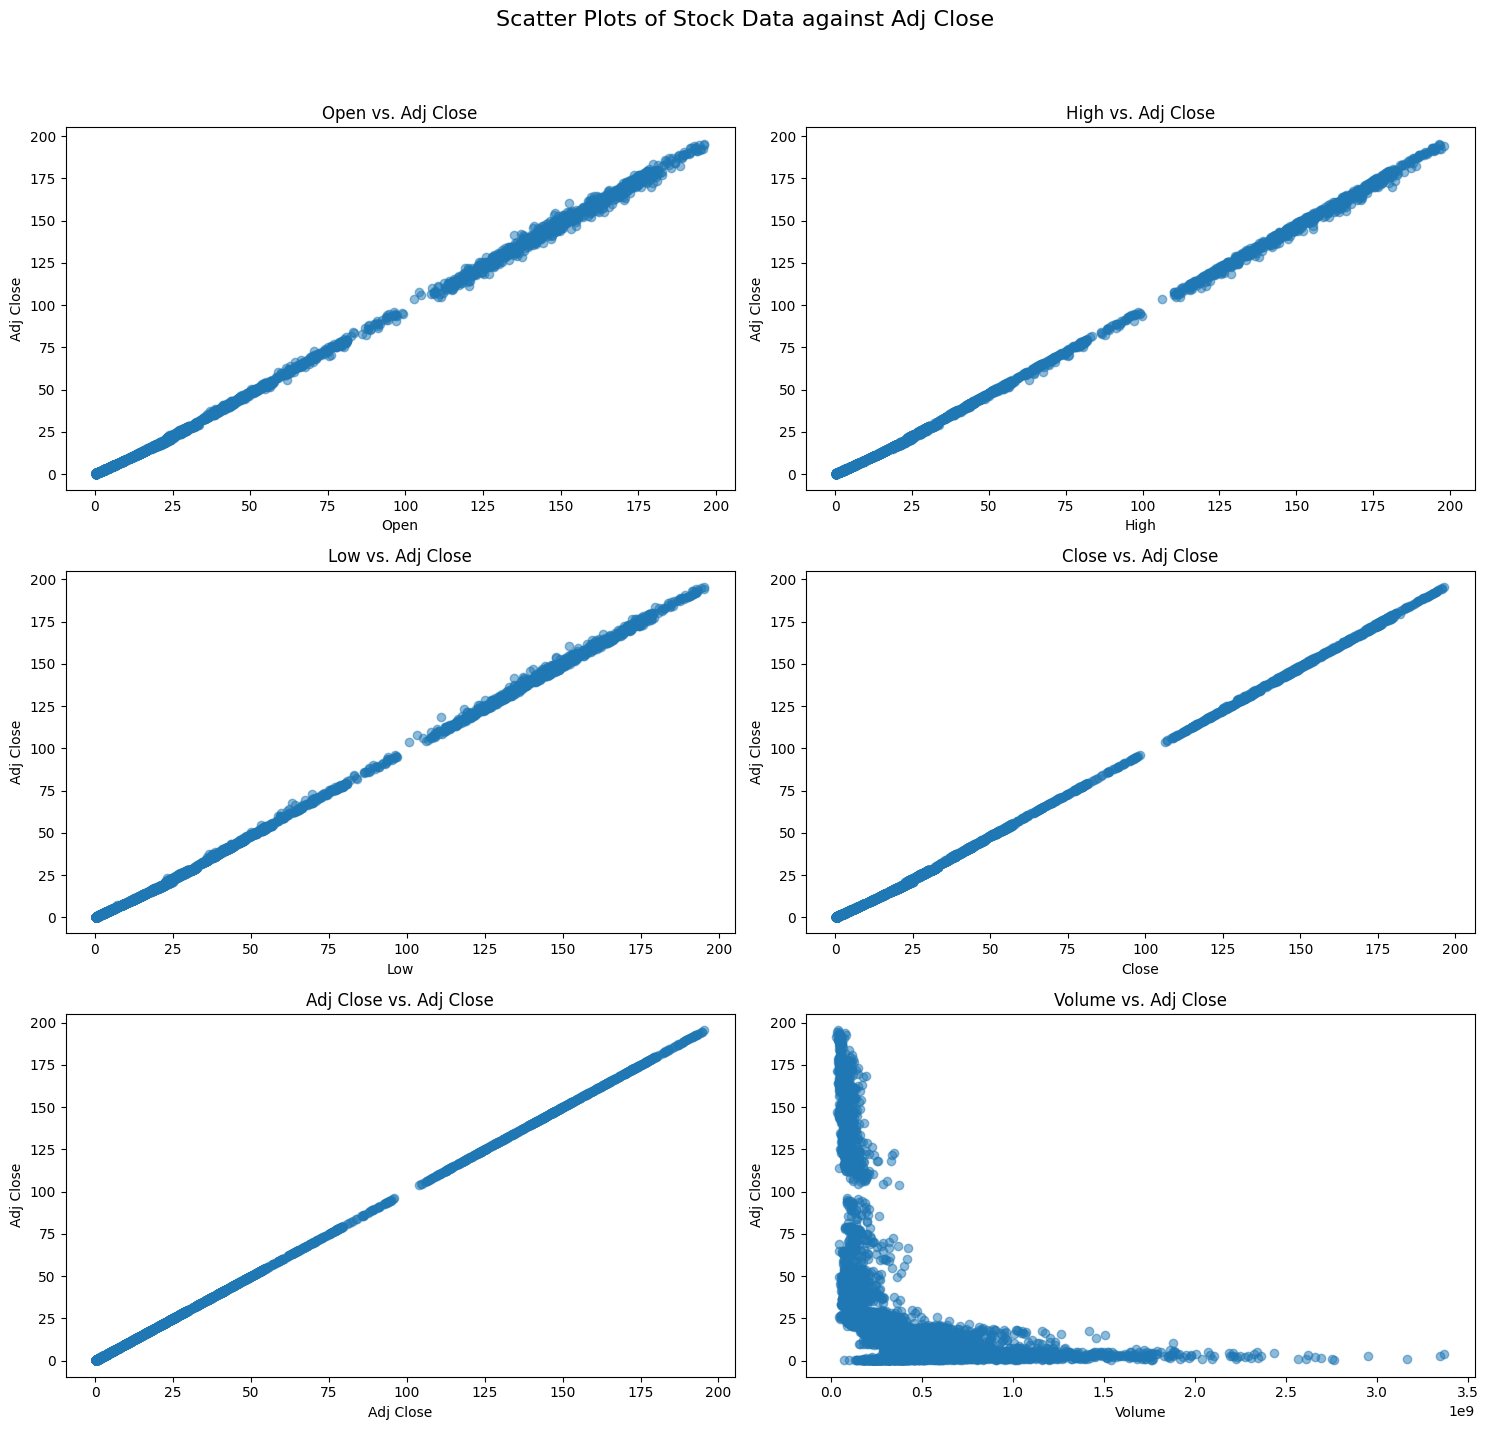

In [64]:

# Tính toán số lượng cột và số lượng hàng dựa vào số cột trong DataFrame
num_cols = len(stock_data.columns)
num_rows = (num_cols + 1) // 2  # Số hàng làm tròn lên nếu có số lẻ cột

# Tạo subplot
fig, axs = plt.subplots(nrows=num_rows, ncols=2, figsize=(15, 5 * num_rows))
fig.suptitle('Scatter Plots of Stock Data against Adj Close', fontsize=16)

# Duyệt qua từng cột và vẽ biểu đồ scatter
for i, column in enumerate(stock_data.columns):
    row, col = divmod(i, 2)
    axs[row, col].scatter(stock_data[column], stock_data['Adj Close'], alpha=0.5)
    axs[row, col].set_title(f'{column} vs. Adj Close')
    axs[row, col].set_xlabel(column)
    axs[row, col].set_ylabel('Adj Close')

# Hiển thị biểu đồ
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### <font color = 'yellow' >Thông qua biểu đồ heatmap và biểu đồ scatter, ta thấy sự phụ thuộc tuyến tính giữa cột Adj close với các cột Open, hight, low, close. <br>Vì thế nên ta sẽ chia tập X, y như sau <font>

In [65]:
# Chọn cột 'Adj Close' (giá đóng cửa đã điều chỉnh) làm biến phụ thuộc (y)
y = stock_data['Adj Close']
y

Date
2003-10-20      0.350561
2003-10-21      0.349957
2003-10-22      0.343616
2003-10-23      0.347089
2003-10-24      0.341200
                 ...    
2023-10-13    178.145447
2023-10-16    178.015930
2023-10-17    176.452133
2023-10-18    175.147293
2023-10-19    174.768784
Name: Adj Close, Length: 5035, dtype: float64

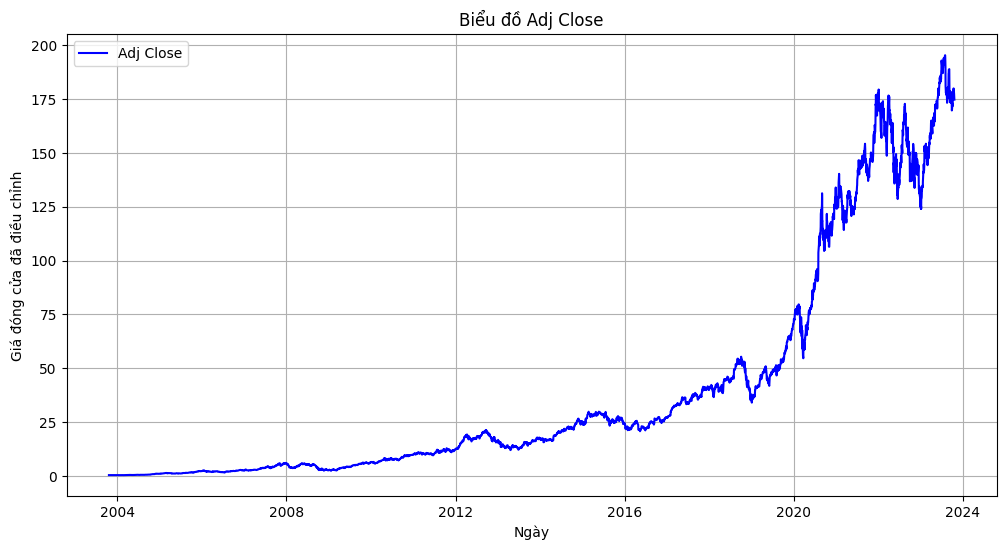

In [66]:
# Vẽ biểu đồ đường cho cột 'Adj Close'
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, y, label='Adj Close', color='blue')
plt.title('Biểu đồ Adj Close')
plt.xlabel('Ngày')
plt.ylabel('Giá đóng cửa đã điều chỉnh')
plt.legend()
plt.grid(True)
plt.show()

In [67]:
# Chọn các cột trừ cột 'Adj Close' và 'Volume làm biến độc lập (x)
X = stock_data.drop(columns=['Adj Close','Volume'])
X

,Open,High,Low,Close
Date,,,,
2003-10-20,0.403571,0.416786,0.399643,0.414643
2003-10-21,0.416250,0.417857,0.406250,0.413929
2003-10-22,0.409643,0.414286,0.405000,0.406429
2003-10-23,0.405893,0.413393,0.403393,0.410536
2003-10-24,0.402857,0.408036,0.396964,0.403571
...,...,...,...,...
2023-10-13,181.419998,181.929993,178.139999,178.850006
2023-10-16,176.750000,179.080002,176.509995,178.720001
2023-10-17,176.649994,178.419998,174.800003,177.149994


### <font color = 'yellow' >Thay vì sử dụng chỉ số( index) là số thứ tự thì ta sẽ dùng ngày tháng. Do ko ảnh hưởng đến việc huấn luyện nên ta không cần chuyển về dạng số thứ tự<font>

In [68]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
#kiểm tra độ lớn của dữ liệu sau khi chia

(4028, 4)
(1007, 4)
(4028,)
(1007,)


In [70]:
X_train

,Open,High,Low,Close
Date,,,,
2016-05-09,23.250000,23.442499,23.147499,23.197500
2006-03-01,2.458571,2.481786,2.429286,2.467857
2016-01-06,25.139999,25.592501,24.967501,25.174999
2006-04-13,2.369286,2.408571,2.350357,2.373929
2005-08-03,1.542500,1.546786,1.527500,1.543571
...,...,...,...,...
2021-05-20,125.230003,127.720001,125.099998,127.309998
2005-08-25,1.647143,1.660357,1.636071,1.645000
2016-02-02,23.855000,24.010000,23.570000,23.620001


In [71]:
X_test

,Open,High,Low,Close
Date,,,,
2018-04-09,42.470001,43.272499,42.462502,42.512501
2022-06-09,147.080002,147.949997,142.529999,142.639999
2012-12-12,19.563213,19.571428,19.152500,19.250000
2020-08-31,127.580002,131.000000,126.000000,129.039993
2008-11-04,3.928214,3.992500,3.809643,3.963929
...,...,...,...,...
2013-10-22,18.800358,18.873215,18.143929,18.566786
2018-03-14,45.080002,45.130001,44.452499,44.610001
2005-08-22,1.648214,1.669643,1.616429,1.638214


In [72]:
y_train

Date
2016-05-09     21.306591
2006-03-01      2.086457
2016-01-06     22.858931
2006-04-13      2.007046
2005-08-03      1.305016
                 ...    
2021-05-20    125.170639
2005-08-25      1.390770
2016-02-02     21.446993
2018-10-12     52.971058
2007-03-22      2.837098
Name: Adj Close, Length: 4028, dtype: float64

In [73]:
y_test

Date
2018-04-09     40.258282
2022-06-09    141.044281
2012-12-12     16.419495
2020-08-31    126.249634
2008-11-04      3.351314
                 ...    
2013-10-22     16.140345
2018-03-14     42.244560
2005-08-22      1.385033
2023-05-08    172.345062
2008-10-31      3.248653
Name: Adj Close, Length: 1007, dtype: float64

### <font color = 'yellow' >Ta hãy lưu mô hình chuẩn hóa sau vào 1 file, để sau này chúng ta sẽ chuẩn hóa dữ liệu nhập vào theo file này( lưu chuẩn hóa của X vì dữ liệu chúng ta nhập vào là tập dữ liệu X, tức đầu vào)<font>

In [74]:
from sklearn.preprocessing import MinMaxScaler
minmax_scale = MinMaxScaler()
X_train = minmax_scale.fit_transform(X_train)
import pickle
with open("Scaler_Apple.pkl", "wb") as file:
    pickle.dump(minmax_scale, file)
X_test = minmax_scale.transform(X_test)
X_train

array([[0.11702975, 0.11667639, 0.11766868, 0.1168588 ],
       [0.01077164, 0.01074723, 0.01076149, 0.01081155],
       [0.12668891, 0.12754186, 0.12706   , 0.12697515],
       ...,
       [0.1201217 , 0.11954437, 0.11984881, 0.1190202 ],
       [0.2798301 , 0.27979721, 0.277953  , 0.28225034],
       [0.01531467, 0.015236  , 0.015365  , 0.01535358]])

In [75]:
X_train, X_train.shape

(array([[0.11702975, 0.11667639, 0.11766868, 0.1168588 ],
        [0.01077164, 0.01074723, 0.01076149, 0.01081155],
        [0.12668891, 0.12754186, 0.12706   , 0.12697515],
        ...,
        [0.1201217 , 0.11954437, 0.11984881, 0.1190202 ],
        [0.2798301 , 0.27979721, 0.277953  , 0.28225034],
        [0.01531467, 0.015236  , 0.015365  , 0.01535358]]),
 (4028, 4))

In [76]:
X_test,X_test.shape

(array([[0.21525681, 0.21689127, 0.21733523, 0.21566912],
        [0.74988386, 0.74589996, 0.73368937, 0.72789433],
        [0.0981878 , 0.09711316, 0.09705425, 0.09666445],
        ...,
        [0.00663018, 0.00664291, 0.0065671 , 0.00656732],
        [0.87969482, 0.87679084, 0.88632392, 0.88576575],
        [0.01780977, 0.01819964, 0.01760225, 0.01784385]]),
 (1007, 4))

# <font color = 'red'>3:Huấn luyện mô hình<font>

In [77]:

from sklearn.linear_model import LinearRegression, Ridge, Lasso

model_LinearRegression = LinearRegression()
model_Ridge = Ridge()
model_Lasso = Lasso()

model_LinearRegression.fit(X_train, y_train) # fit chính là hàm đào tạo
model_Ridge.fit(X_train, y_train) # fit chính là hàm đào tạo
model_Lasso.fit(X_train, y_train) # fit chính là hàm đào tạo

c:\Users\ADMIN\anaconda3\envs\condaa\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.311e+03, tolerance: 1.041e+03
  model = cd_fast.enet_coordinate_descent(


Lasso()

# <font color="red">4:Đánh giá mô hình</font>

In [78]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt


In [79]:
y_pred_linear = model_LinearRegression.predict(X_test) 
y_pred_Lasso = model_Lasso.predict(X_test) 
y_pred_Ridge = model_Ridge.predict(X_test) 
def danh_gia(y_test, y_pred_linear,y_pred_Lasso,y_pred_Ridge):
    print('Kết quả trên hồi quy tuyến tính')
    mse_linear = mean_squared_error(y_pred_linear,y_test)
    mae_linear = mean_absolute_error(y_pred_linear,y_test)
    rmse_linear = sqrt(mean_squared_error(y_pred_linear,y_test))
    r2_linear = r2_score(y_pred_linear,y_test)
    print(f'MSE: {mse_linear}, MAE:{mae_linear}, RMSE:{rmse_linear}, R2:{r2_linear}')

    print('Kết quả trên hồi quy Lasso')
    mse_lasso = mean_squared_error(y_pred_Lasso,y_test)
    mae_lasso = mean_absolute_error(y_pred_Lasso,y_test)
    rmse_lasso = sqrt(mean_squared_error(y_pred_Lasso,y_test))
    r2_lasso = r2_score(y_pred_Lasso,y_test)
    print(f'MSE: {mse_lasso}, MAE:{mae_lasso}, RMSE:{rmse_lasso}, R2:{r2_lasso}')

    print('Kết quả trên hồi quy Ridge')
    mse_ridge = mean_squared_error(y_pred_Ridge,y_test)
    mae_ridge = mean_absolute_error(y_pred_Ridge,y_test)
    rmse_ridge = sqrt(mean_squared_error(y_pred_Ridge,y_test))
    r2_ridge = r2_score(y_pred_Ridge,y_test)
    print(f'MSE: {mse_ridge}, MAE:{mae_ridge}, RMSE:{rmse_ridge}, R2:{r2_ridge}')
danh_gia(y_test,y_pred_linear,y_pred_Lasso,y_pred_Ridge)

Kết quả trên hồi quy tuyến tính
MSE: 0.859035843418987, MAE:0.7966517245850223, RMSE:0.9268418653788719, R2:0.9996859135635674
Kết quả trên hồi quy Lasso
MSE: 17.028417940266127, MAE:3.0074470834939078, RMSE:4.126550368075752, R2:0.9927097534317679
Kết quả trên hồi quy Ridge
MSE: 1.090015419222116, MAE:0.8874937891788057, RMSE:1.04403803533306, R2:0.9996002864766029


In [80]:
y_pred = model_LinearRegression.predict(X_test) #dự báo y_pred dựa trên tập x_test
y_pred_train = model_LinearRegression.predict(X_train)
# Đánh giá mô hình bằng một số các metric, gói gọn vào 1 hàm để sử dụng ở phần sau
def rate(y_test, y_pred,y_train,y_pred_train):
    print('--------Kết quả trên dữ liệu huấn luyện-------')
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_train = r2_score(y_train, y_pred_train)

    print("Mean Squared Error (MSE):", mse_train)
    print("R-squared (R2) Score:", r2_train)

    print('--------Kết quả thẩm định-------')
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("Mean Squared Error (MSE):", mse)
    print("R-squared (R2) Score:", r2)

In [81]:
y_pred.shape

(1007,)

In [82]:
y_test.shape

(1007,)

In [83]:
rate(y_test, y_pred,y_train,y_pred_train)

--------Kết quả trên dữ liệu huấn luyện-------
Mean Squared Error (MSE): 0.8149677283932056
R-squared (R2) Score: 0.9996845293261405
--------Kết quả thẩm định-------
Mean Squared Error (MSE): 0.859035843418987
R-squared (R2) Score: 0.9996861476307781


In [84]:
print(y_test)

Date
2018-04-09     40.258282
2022-06-09    141.044281
2012-12-12     16.419495
2020-08-31    126.249634
2008-11-04      3.351314
                 ...    
2013-10-22     16.140345
2018-03-14     42.244560
2005-08-22      1.385033
2023-05-08    172.345062
2008-10-31      3.248653
Name: Adj Close, Length: 1007, dtype: float64


In [85]:
print(y_pred)

[4.08778275e+01 1.40595982e+02 1.76690891e+01 ... 1.49969028e-01
 1.71128627e+02 2.35147020e+00]


In [86]:
df_result = pd.DataFrame({'Actual':y_test, 'Predicted': y_pred})
df_compare = df_result.head(10)
df_compare
#so sánh dữ liệu thực tế với dự đoán

,Actual,Predicted
Date,,
2018-04-09,40.258282,40.877828
2022-06-09,141.044281,140.595982
2012-12-12,16.419495,17.669089
2020-08-31,126.249634,127.117450
2008-11-04,3.351314,2.463781
2013-04-17,12.341964,12.842761
2004-10-04,0.585628,-0.792413
2020-09-14,112.865448,113.298543
2020-04-17,68.860283,68.874190


<Axes: xlabel='Date'>

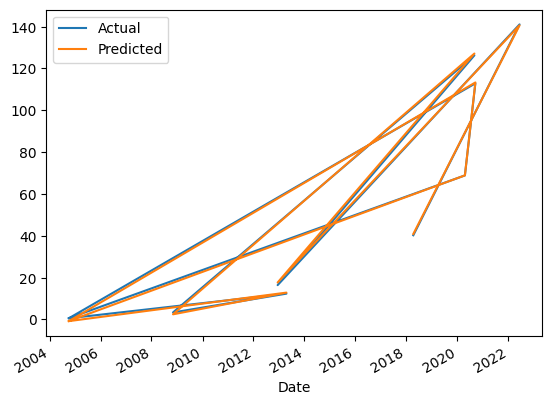

In [87]:
df_compare.plot(kind='line')
# lập biểu đồ độ để dễ đánh giá

### <font color = "green"> Ta thấy mô hình quá tốt<font>

In [88]:
open_price = 19.563213	
high_price = 19.571428
low_price = 19.152500
close_price = 19.250000

new_data_scaled = minmax_scale.transform([[open_price,high_price,low_price,close_price]])
predicted_linear = model_LinearRegression.predict(new_data_scaled)
predicted_lasso = model_Lasso.predict(new_data_scaled)
predicted_ridge = model_Ridge.predict(new_data_scaled)
print('Kết quả dự báo trên HQTT:',predicted_linear[0])
print('Kết quả dự báo trên Lasso:',predicted_lasso[0])
print('Kết quả dự báo trên Ridge:',predicted_ridge[0])


Kết quả dự báo trên HQTT: 17.66908910996897
Kết quả dự báo trên Lasso: 19.48912313763171
Kết quả dự báo trên Ridge: 17.826655533284576


c:\Users\ADMIN\anaconda3\envs\condaa\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
